In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from math import exp,log

warnings.filterwarnings( "ignore" )
np.random.seed(1)

In [2]:
myData = pd.read_csv("dataset_NN.csv")

X = myData.iloc[:,:-1]
y = myData.iloc[:,-1:]

myData = (X - X.min())/(X.max() - X.min())
myData["class"] = y

In [3]:
train_data = myData.sample(frac = 0.7).reset_index(drop = True)
test_data = myData.drop(train_data.index).reset_index(drop = True)
train_data = train_data.reset_index(drop = True)

In [4]:
num_of_hidden_nodes = 13
num_of_hidden_nodes2 = 8
num_of_output_nodes = 10
num_of_attributes = train_data.shape[1] - 1
rows = train_data.shape[0]

wh = np.random.randn(num_of_attributes, num_of_hidden_nodes)
bh = np.random.randn(1, num_of_hidden_nodes)
wh2 = np.random.randn(num_of_hidden_nodes, num_of_hidden_nodes2)
bh2 = np.random.randn(1, num_of_hidden_nodes2)
wo = np.random.randn(num_of_hidden_nodes2, num_of_output_nodes)
bo = np.random.randn(1, num_of_output_nodes)

In [5]:
learning_rate = 0.00003
loss_list = []
x_values = []
accuracy = []

In [6]:
def ReLU(x):
    return np.maximum(x, 0)

In [7]:
def der_ReLU(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [8]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis = 1, keepdims = True)

In [9]:
xi=np.array(train_data.iloc[:,:-1].values)
value=train_data.iloc[:,-1:].values
one_hot_labels=np.zeros((rows, num_of_output_nodes))
for i in range(rows):
    one_hot_labels[i, value[i][0]-1] = 1

In [10]:
for itr in range(50000):
    zh = np.dot(xi,wh) + bh
    ah = ReLU(zh)
    zh2 = np.dot(ah,wh2) + bh2
    ah2 = ReLU(zh2)
    zo = np.dot(ah2,wo) + bo
    ao = softmax(zo)
    
    dcost_dzo=ao-one_hot_labels
    dcost_dwo=np.dot(ah2.T,dcost_dzo)
    
    wo-=learning_rate*dcost_dwo
    bo-=learning_rate*dcost_dzo.sum(axis=0)
    
    dcost_dah2=np.dot(dcost_dzo,wo.T)
    dcost_dzh2=dcost_dah2*der_ReLU(zh2)
    dcost_dwh2=np.dot(ah.T,dcost_dzh2)
    
    wh2-=learning_rate*dcost_dwh2
    bh2-=learning_rate*dcost_dzh2.sum(axis=0)
    
    dcost_dah=np.dot(dcost_dzh2,wh2.T)
    dcost_dzh=dcost_dah*der_ReLU(zh)
    dcost_dwh=np.dot(xi.T,dcost_dzh)
    
    wh-=learning_rate*dcost_dwh
    bh-=learning_rate*dcost_dzh.sum(axis=0)
    
    if itr % 1000 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        loss /= rows
        print('Loss function value: ', loss)
        loss_list.append(loss)
        x_values.append(itr)
        count = 0
        for k in range(rows):
            if np.argmax(one_hot_labels[k]) == np.argmax(ao[k]):
                count += 1
        accuracy.append((count*100) / rows)
        print('Training Accuracy:', (count*100) / rows)

Loss function value:  6.838315173858297
Training Accuracy: 17.571428571428573
Loss function value:  0.8150398237489412
Training Accuracy: 67.78571428571429
Loss function value:  0.7128404423890874
Training Accuracy: 70.78571428571429
Loss function value:  0.6831571613407555
Training Accuracy: 71.78571428571429
Loss function value:  0.6659942088774385
Training Accuracy: 72.14285714285714
Loss function value:  0.6526463331464083
Training Accuracy: 72.35714285714286
Loss function value:  0.6413105528571844
Training Accuracy: 72.42857142857143
Loss function value:  0.6303539246453324
Training Accuracy: 73.07142857142857
Loss function value:  0.6178539317170937
Training Accuracy: 73.78571428571429
Loss function value:  0.6024994935187264
Training Accuracy: 74.71428571428571
Loss function value:  0.5869116748270676
Training Accuracy: 75.35714285714286
Loss function value:  0.5761109024380733
Training Accuracy: 75.71428571428571
Loss function value:  0.5699372038617216
Training Accuracy: 75.6

Accuracy on testing data:  82.66666666666667


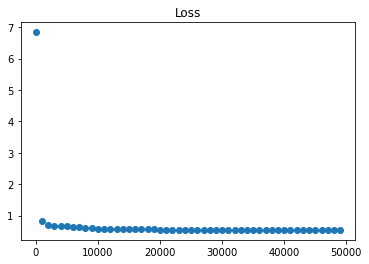

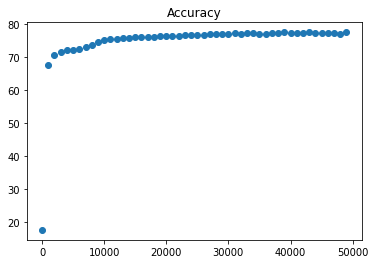

In [11]:
rows = test_data.shape[0]

xi = np.array(test_data.iloc[:,:-1].values)
value = test_data.iloc[:,-1:].values
one_hot_labels = np.zeros((rows, num_of_output_nodes))
for i in range(rows):
    one_hot_labels[i, value[i][0]-1] = 1
    
zh = np.dot(xi,wh) + bh
ah = ReLU(zh)
zh2 = np.dot(ah,wh2) + bh2
ah2 = ReLU(zh2)
zo = np.dot(ah2,wo) + bo
ao = softmax(zo)
count = 0

#Accuracy on testing data
for k in range(rows):
    if np.argmax(one_hot_labels[k]) == np.argmax(ao[k]):
        count += 1
print('Accuracy on testing data: ', (count * 100) / rows)

plt.scatter(x_values, loss_list)
plt.title("Loss")
plt.show()
plt.scatter(x_values, accuracy)
plt.title("Accuracy")
plt.show()